In [2]:
%pip install pandas numpy scikit-learn matplotlib seaborn

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/JasonJTX/Data-Analytics/refs/heads/main/OnlineShoppersIntention/online_shoppers_intention.csv')

# Preprocess
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])

scaler = StandardScaler()
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

X = data.drop(columns=['Revenue'])
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# Definisikan model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Jadikan F1-Score sebagai metrik evaluasi utama (TIDAK MENGGUNAKAN K-FOLD)
scoring = 'f1'
model_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring=scoring)
    model_scores[model_name] = scores
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Definisikan model terbaik
best_model_name = max(model_scores, key=lambda k: model_scores[k].mean())
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Logistic Regression: 0.5116 ± 0.0286
Random Forest: 0.6544 ± 0.0222
SVM: 0.5321 ± 0.0268
Best Model: Random Forest


In [5]:
# Definisikan model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Jadikan F1-Score sebagai metrik evaluasi utama & Gunakan K-Fold Cross Validation untuk memperdalam proses evaluasi model
scoring = 'f1'
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scoring)
    model_scores[model_name] = scores
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Definisikan model terbaik
best_model_name = max(model_scores, key=lambda k: model_scores[k].mean())
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Logistic Regression: 0.5049 ± 0.0212
Random Forest: 0.6483 ± 0.0234
SVM: 0.5329 ± 0.0133
Best Model: Random Forest


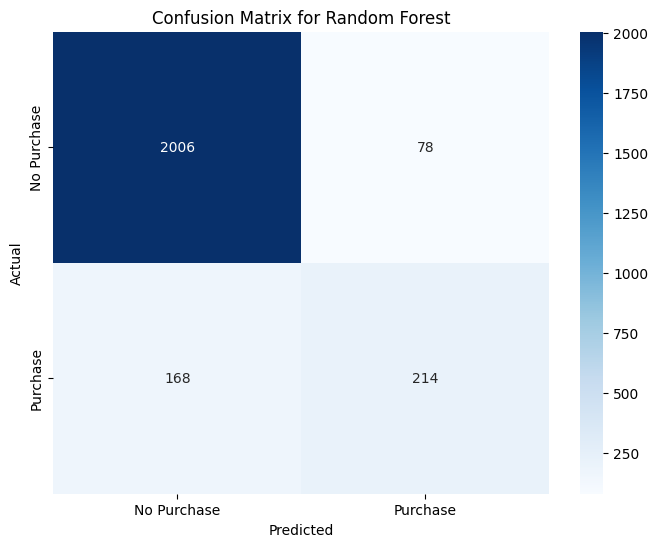

In [6]:
# Visualisasikan confusion matrix dari model dengan performa terbaik
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()
